# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [227]:
#ваш код 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data\Advertising.csv')

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [228]:
#ваш код 
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [229]:
#ваш код 
X = data[['TV','radio','newspaper']]
y = data['sales']
# преобразуем в массивы
X = np.array(X)
y = np.array(y)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [230]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [231]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [232]:
# ваш код 
num_iters = 100 #количество итераций
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros((n,1)) #вектор размера nx1, состоящий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
print(w)

[[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [233]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

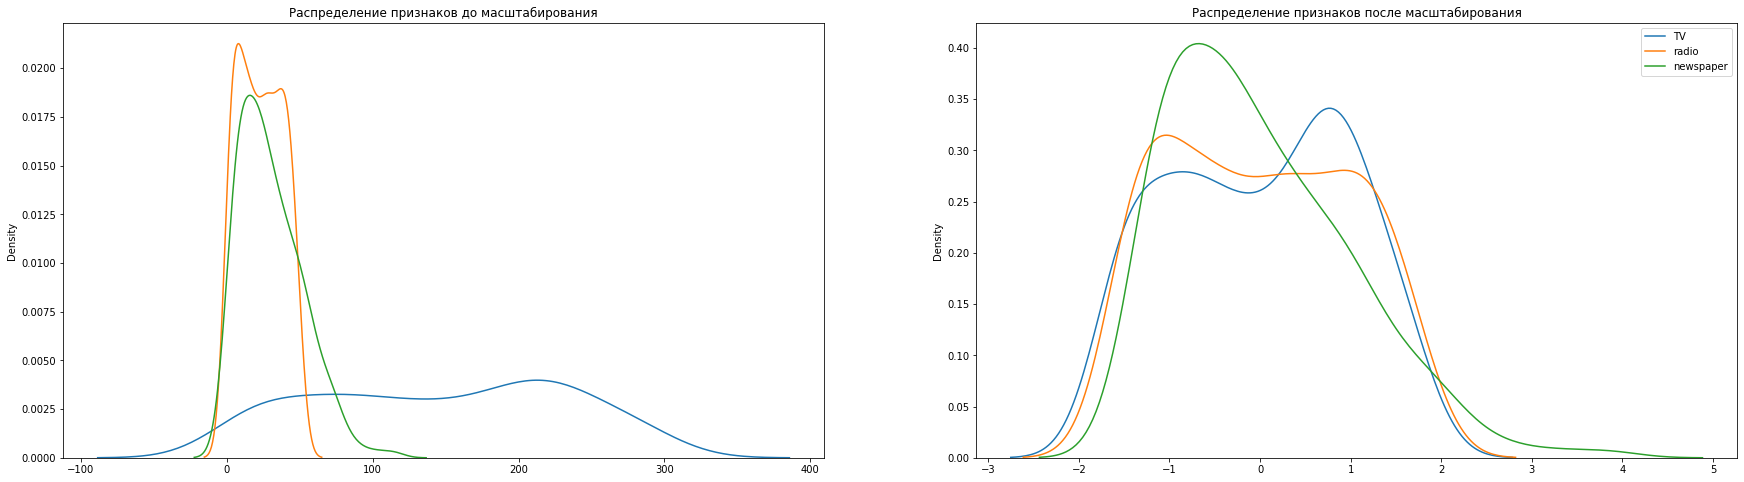

In [234]:
#ваш код
X = data[['TV','radio','newspaper']]
X = np.array(X) # преобразуем в массив
# начертим графики распределения признаков:
fig, ax = plt.subplots(ncols=2, figsize=(30, 8))
ax[0].set_title('Распределение признаков до масштабирования')
sns.kdeplot(X[:,0], ax=ax[0], label ='TV')
sns.kdeplot(X[:,1], ax=ax[0], label ='radio')
sns.kdeplot(X[:,2], ax=ax[0], label ='newspaper')
# выполним масштабирование признаков и начертим второй график распределения признаков после масштабирования
X = ( X - np.mean(X, axis=0) ) / np.std(X, axis=0)
ax[1].set_title('Распределение признаков после масштабирования')
sns.kdeplot(X[:,0], ax=ax[1], label ='TV')
sns.kdeplot(X[:,1], ax=ax[1], label ='radio')
sns.kdeplot(X[:,2], ax=ax[1], label ='newspaper')
plt.legend();

**Добавим единичный столбец**

In [235]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [236]:
#ваш код
def mse_error(y, y_pred):
    mse = np.sum((y_pred - y)**2) / len(y)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [237]:
#ваш код
y_pred = np.mean(y) # вычисляем среднее значение по столбцу sales
print(mse_error(y, y_pred)) # вычисляем ошибку

27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [238]:
#ваш код
def lin_pred(X, w):
    y_pred = np.dot(X, w)
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [239]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    """ 
    функция для реализации шага стохастического градиентного спуска

    Args:
        X (_type_): матрица наблюдений
        y (_type_): вектор целевой переменной
        w (_type_): вектор коэффициентов (весов)
        train_ind: индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
        eta (_type_): шаг градиентного спуска

    Returns:
        w_new: Обновленный вектор коэффициентов
    """
    y_pred = lin_pred(X[train_ind], w.T)
    n = len(X[train_ind])
    step = 2 * X[train_ind] * (y_pred - y[train_ind])/ n
    w_new = w - eta*step
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [240]:
# ваш код
def stochastic_gradient_descent(X, y, w0, eta, iterations, precision):
    """
    функция реализации стохастического градиентного спуска

    Args:
        X (_type_): Матрицу признаков X
        y (_type_): Целевую переменнную
        par0 (_type_): Изначальную точку (веса модели)
        eta (_type_): параметр, определяющий темп обучения
        iterations (_type_): Максимальное число итераций
        precision (_type_): Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

    Returns:
        par: итоговый набор параметров (веса модели)
        mse: метрики MSE для каждого шага стохастического градиентного спуска
    """
    distance = float('inf') # Инициализируем расстояние между векторами весов на соседних итерациях бесконечностью
    mse = [] # пустой список для фиксации ошибок
    i = 0 # счетчик итераций
    w = w0
    # цикл обучения
    while True:
        if i > iterations or distance < precision:
            break
        train_ind = np.random.randint(X.shape[0]) # генерация случайного индекса
        mse.append(mse_error(y, lin_pred(X, w.T)))
        w_new = stoch_grad_step(X, y, w, train_ind, eta) # новый вектор весов
        distance = np.linalg.norm( w - w_new ) # расстояние между векторами весов
        w = w_new
        i += 1
    return w, mse

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

Text(0, 0.5, 'MSE')

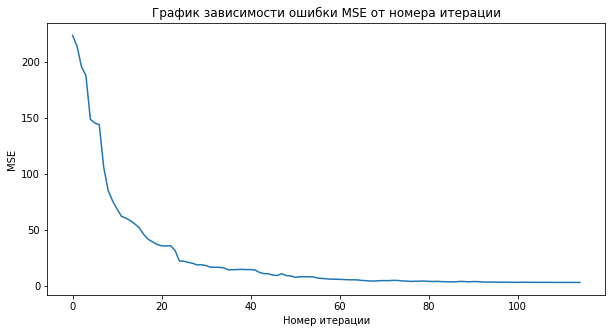

In [241]:
# ваш код
w0 = np.zeros((4,1)).T # инициализация вектора весов модели
eta = 0.1 # 
iter = 1e+5 #
precision = 0.001 #
w, mse = stochastic_gradient_descent(X, y, w0, eta, iter, precision)
#Строим график изменения ошибки
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим график изменения MSE
ax.plot(mse)
ax.set_title('График зависимости ошибки MSE от номера итерации')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('MSE')

**Выведите вектор весов, к которому сошелся метод.**

In [242]:
# ваш код
print('Итоговый набор весов модели', w)

Итоговый набор весов модели [[14.04259279  3.9881555   2.79450841 -0.28990509]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [243]:
# ваш код
print('Итоговое значение MSE', mse[len(mse)-1])

Итоговое значение MSE 2.8581078157167643


In [244]:
# ваш код
print('Градиентный спуск')
print('шаг градиентного спуска:', eta)
print('заданное кол-во итераций:', iter)
print('израсходовано итераций по факту:', len(mse))
print('Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу:', precision)
print('-'*150)      
print('Итоговый набор весов модели', w)
print('Итоговое значение MSE', mse[len(mse)-1])

Градиентный спуск
шаг градиентного спуска: 0.1
заданное кол-во итераций: 100000.0
израсходовано итераций по факту: 115
Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу: 0.001
------------------------------------------------------------------------------------------------------------------------------------------------------
Итоговый набор весов модели [[14.04259279  3.9881555   2.79450841 -0.28990509]]
Итоговое значение MSE 2.8581078157167643


### Дополнение
________________

### Реализация методом пакетного градиентного спуска (Batch Gradient Descent)

In [245]:
def grad_step(X, y, w, eta):
    """ 
    функция для шага градиентного спуска

    Args:
        X (_type_): матрица наблюдений
        y (_type_): вектор целевой переменной
        w (_type_): вектор коэффициентов (весов)
        eta (_type_): шаг градиентного спуска

    Returns:
        w_new: Обновленный вектор коэффициентов
    """
    y_pred = lin_pred(X, w)
    n = len(X)
    step = 2 * np.dot(X.transpose(), (y_pred - y))/ n
    w_new = w - eta*step
    return w_new

In [246]:
def gradient_descent(X, y, w0, eta, iterations, precision):
    """
    функция реализации градиентного спуска

    Args:
        X (_type_): Матрицу признаков X
        y (_type_): Целевую переменнную
        par0 (_type_): Изначальную точку (веса модели)
        eta (_type_): параметр, определяющий темп обучения
        iterations (_type_): Максимальное число итераций
        precision (_type_): Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

    Returns:
        par: итоговый набор параметров (веса модели)
        mse: метрики MSE для каждого шага стохастического градиентного спуска
    """
    distance = float('inf') # Инициализируем расстояние между векторами весов на соседних итерациях бесконечностью
    mse = [] # пустой список для фиксации ошибок
    i = 0 # счетчик итераций
    w = w0
    # цикл обучения
    while True:
        mse.append(mse_error(y, lin_pred(X, w)))
        w_new = grad_step(X, y, w, eta)
        distance = np.linalg.norm( w - w_new )
        if i > iterations or distance < precision:
            break
        w = w_new
        i += 1
    return w, mse    

Text(0, 0.5, 'MSE')

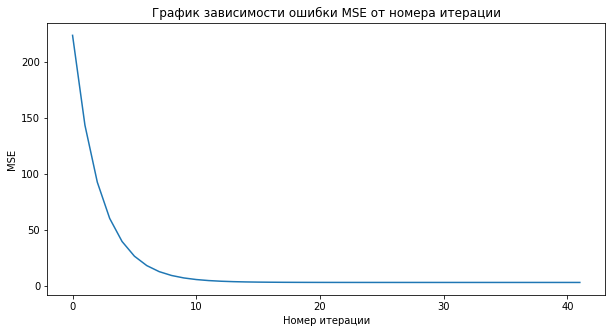

In [247]:
# ваш код
w = np.zeros((4,1)) # инициализация вектора весов модели
eta = 0.1 # 
iter = 1e+5 #
precision = 0.001 #
w, mse = gradient_descent(X, y, w, eta, iter, precision)
#Строим график изменения ошибки
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим график изменения MSE
ax.plot(mse)
ax.set_title('График зависимости ошибки MSE от номера итерации')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('MSE')

In [248]:
# ваш код
print('Градиентный спуск')
print('шаг градиентного спуска:', eta)
print('заданное кол-во итераций:', iter)
print('израсходовано итераций по факту:', len(mse))
print('Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу:', precision)
print('-'*150)      
print('Итоговый набор весов модели', w.T)
print('Итоговое значение MSE', mse[len(mse)-1])

Градиентный спуск
шаг градиентного спуска: 0.1
заданное кол-во итераций: 100000.0
израсходовано итераций по факту: 42
Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу: 0.001
------------------------------------------------------------------------------------------------------------------------------------------------------
Итоговый набор весов модели [[14.02100887  3.91880448  2.78724462 -0.01759698]]
Итоговое значение MSE 2.784159497510698


Вывод: на данной обучающей выборке пакетный градиентный спуск (Batch Gradient Descent) быстрее достигает необходимой точности и результирующая ошибка меньше, чем у стохастического градиентного спуска